In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

# Subway-Rotterdam

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 1579/1579 [00:00<00:00, 8761.26it/s]


In [5]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)"
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)"
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)"
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)"
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)"
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)"
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)"
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)"


In [6]:
nodes

,geometry,degree,id
0,POINT (4.5164659 52.0638003),3,0
1,POINT (4.5158864 52.0634334),2,1
2,POINT (4.403601 52.0622859),2,2
3,POINT (4.4069211 52.0591462),2,3
4,POINT (4.3767271 51.9129032),2,4
...,...,...,...
1386,POINT (4.3150312 51.9037243),2,1386
1387,POINT (4.2352056 51.9261681),2,1387
1388,POINT (4.1275874 51.9764225),2,1388
1389,POINT (4.1273157 51.9770415),2,1389


In [7]:
replacement_dict = {
     
}

sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
2,11174054,subway,Schiedam Centrum,Metro A: Binnenhof => Schiedam Centrum,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
3,11174055,subway,Binnenhof,Metro A: Schiedam Centrum => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
4,11174056,subway,Binnenhof,Metro A: Kralingse Zoom => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
5,11174057,subway,Kralingse Zoom,Metro A: Binnenhof => Kralingse Zoom,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
6,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
7,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
8,11171043,subway,Steendijkpolder,Metro B: Nesselande => Steendijkpolder,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
9,11171044,subway,Nesselande,Metro B: Steendijkpolder => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.22415 51.93300, 4.22418 51..."


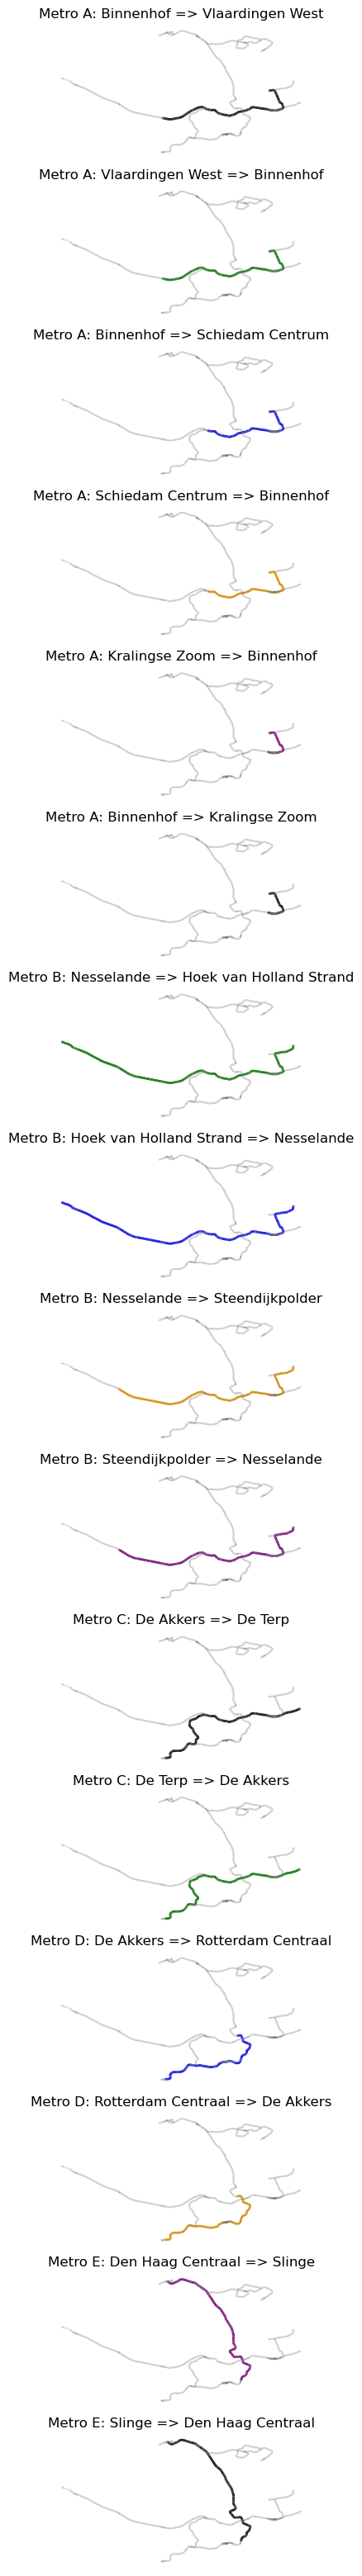

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Rotterdam')

In [10]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)"
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)"
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)"
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)"
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)"
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)"
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)"
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)"


In [11]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

## Add columns to nodes

In [12]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [13]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x      geo_y
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087  51.903822
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566  51.903182
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506  51.910139
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189  51.922675
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662  51.921774
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827  51.913281
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718  51.909998
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247  51.909546
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097  51.912249
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   51.91635
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369    51.917

In [14]:
sub_routes = sub_routes[sub_routes['name'].isin(selected_routes)].reset_index(drop=True)

In [15]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [16]:
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x  \
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087   
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566   
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506   
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189   
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662   
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827   
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718   
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247   
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097   
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369   
 11   2                Blaak  POINT (4.4890906 51.9200477)  4.489091   
 12   5            Oos

In [17]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, nodes)

In [18]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","A, B, C"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [19]:
sub_new_nodes.to_excel('./sub_new_nodes911_0.xlsx',header = True, index = False)

## Add columns to edges

In [20]:
sub_shortest_path_edges = {key: sub_shortest_path_edges[key] for key in selected_routes}

In [21]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [22]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [23]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges,edges)

In [24]:
sub_new_edges

,osm_id,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,6305896,light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,6305933,light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,6307148,subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",1.0,Metro C: De Akkers => De Terp,subway,C
3,6307148,subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",1.0,Metro C: De Akkers => De Terp,subway,C
4,6307235,subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)",1.0,Metro C: De Akkers => De Terp,subway,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1575,1162431256,light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1576,1162431257,light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",1.0,Metro E: Den Haag Centraal => Slinge,subway,E
1577,1162431262,light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [25]:
sub_new_edges.to_excel('./sub_new_edges911_0.xlsx',header = True, index = False)

## Test 3: Rotterdam 3 - NO need to transfer, on 1 same routes

In [26]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.4777044514008155, 
    's_coordinates_y': 51.91784551875491, 
    'e_coordinates_x': 4.476658662403528, 
    'e_coordinates_y': 51.94561955479317
} 

In [28]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [29]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
10,POINT (4.48037 51.91790),2,1328,Beurs,4.480369,51.9179,"(4.4803692, 51.9178996)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C, D, E","A, B, C, D, E"


In [30]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
123,POINT (4.46470 51.94824),2,1374,Melanchthonweg,4.464698,51.948236,"(4.4646984, 51.9482363)",Metro E: Den Haag Centraal => Slinge,subway,E,None


### find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [ ]:
def s_e_on_route_gdf(start_node, end_node, routes_df):
    routes_gdf = gpd.GeoDataFrame(routes_df.copy())
    s_e_node_gdf = gpd.GeoDataFrame(pd.concat([start_node.copy(), end_node.copy()],ignore_index=True))

    s_node_on_route_gdf = routes_gdf[routes_gdf.geometry.intersects(s_e_node_gdf.iloc[0].geometry)]
    e_node_on_route_gdf = routes_gdf[routes_gdf.geometry.intersects(s_e_node_gdf.iloc[1].geometry)]
    
    return s_node_on_route_gdf, e_node_on_route_gdf

In [31]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [32]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
2,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
5,2785677,subway,De Akkers,Metro C: De Terp => De Akkers,C,Rail Rotterdam,None,"MULTILINESTRING ((4.59945 51.93557, 4.59948 51..."


In [33]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


### Make judgement of s_e_on_route_gdf

In [34]:
def judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf):   # version3
    s_on_route_ref = s_node_on_route_gdf[['ref']].reset_index(drop=True)
    e_on_route_ref = e_node_on_route_gdf[['ref']].reset_index(drop=True)

    length_s_on_route_ref = len(s_on_route_ref)
    length_e_on_route_ref = len(e_on_route_ref)

    if length_s_on_route_ref < 1:
        print("There is something wrong with function----s_e_on_route_gdf")

    
    elif length_s_on_route_ref == 1:
        if length_e_on_route_ref > 1:
            s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"None of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref

        elif length_e_on_route_ref == 1:
            if s_on_route_ref.equals(e_on_route_ref) == True:
                print(f"s_node and e_node are on one same route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find all stations between start_node and end_node, then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"s_node and e_node are on two different routes:{s_on_route_ref.loc[0,'ref']},{e_on_route_ref.loc[0,'ref']}")
                print(f"The next step is to find transfer station of {s_on_route_ref.loc[0,'ref']} and {e_on_route_ref.loc[0,'ref']}, then find all stations between start_node and end_node, finally calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref

        else:
            print("There is something wrong with function----s_e_on_route_gdf")


    else:
        s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
        if length_e_on_route_ref > 1:
            if s_e_on_route.duplicated().sum() == len(s_on_route_ref):
                print(f"s_node and e_node are on several same routes:{s_on_route_ref.ref.tolist()}\n")
                print("The next step is to find all stations between start_node and end_node on each route,then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref        
            elif s_e_on_route.duplicated().sum() == 0:
                print("Any of e_on_route is not the same as any of s_on_route")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            else:
                s_e_same_route = s_e_on_route[s_e_on_route['ref'].duplicated()]
                print(f"Some of e_on_route is the same as some of s_on_route:{s_e_same_route.ref.tolist()}\n")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            
        elif length_e_on_route_ref == 1:
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref        
            else:
                print(f"None of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all s_on_route and e_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
        
        else:
            print("There is something wrong with function----s_e_on_route_gdf")

In [35]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

None of s_on_route is the same as e_on_route:E

The next step is to find transfer stations of all s_on_route and e_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''


In [ ]:
s_on_route_ref

In [36]:
e_on_route_ref

,ref
0,D
1,E


### get the nearst stations of s_e nodes

### get all stations between s_e stations

### get all nodes and id_pairs of nodes between s_e nodes

### calculate shortest path and plot

## Test 1: Rotterdam1 - NO need to transfer, on 2 same routes 

### Input start and end points, get start_node and end_node dataframe

In [26]:
# donnot need to transfer and has two ways D,E
s_e_coordinates_t1 = {
    's_coordinates_x': 4.4746473, 
    's_coordinates_y': 51.9234388, 
    'e_coordinates_x': 4.4817401, 
    'e_coordinates_y': 51.9129404
} 

In [27]:
# start_node, end_node = s_e_node_df(s_e_coordinates_t1, sub_new_nodes_df)
start_node, end_node = s_e_node_df(s_e_coordinates_t1, sub_new_nodes)

In [28]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
119,POINT (4.47849 51.92323),2,1321,Stadhuis,4.478493,51.923227,"(4.4784926, 51.9232269)",Metro D: Rotterdam Centraal => De Akkers,subway,"D, E","D, E"


In [29]:
end_node 

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
117,POINT (4.48196 51.91403),2,1318,Leuvehaven,4.481963,51.914034,"(4.4819628, 51.914034)",Metro D: Rotterdam Centraal => De Akkers,subway,"D, E","D, E"


### find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [30]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [31]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
7,2785505,subway,De Akkers,Metro D: Rotterdam Centraal => De Akkers,D,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


In [32]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
7,2785505,subway,De Akkers,Metro D: Rotterdam Centraal => De Akkers,D,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


### Make judgement of s_e_on_route_gdf

In [33]:
def judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf):   # version3
    s_on_route_ref = s_node_on_route_gdf[['ref']].reset_index(drop=True)
    e_on_route_ref = e_node_on_route_gdf[['ref']].reset_index(drop=True)

    length_s_on_route_ref = len(s_on_route_ref)
    length_e_on_route_ref = len(e_on_route_ref)

    if length_s_on_route_ref < 1:
        print("There is something wrong with function----s_e_on_route_gdf")

    
    elif length_s_on_route_ref == 1:
        if length_e_on_route_ref > 1:
            s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"None of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref

        elif length_e_on_route_ref == 1:
            if s_on_route_ref.equals(e_on_route_ref) == True:
                print(f"s_node and e_node are on one same route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find all stations between start_node and end_node, then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"s_node and e_node are on two different routes:{s_on_route_ref.loc[0,'ref']},{e_on_route_ref.loc[0,'ref']}")
                print(f"The next step is to find transfer station of {s_on_route_ref.loc[0,'ref']} and {e_on_route_ref.loc[0,'ref']}, then find all stations between start_node and end_node, finally calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref

        else:
            print("There is something wrong with function----s_e_on_route_gdf")


    else:
        s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
        if length_e_on_route_ref > 1:
            if s_e_on_route.duplicated().sum() == len(s_on_route_ref):
                print(f"s_node and e_node are on several same routes:{s_on_route_ref.ref.tolist()}\n")
                print("The next step is to find all stations between start_node and end_node on each route,then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref        
            elif s_e_on_route.duplicated().sum() == 0:
                print("Any of e_on_route is not the same as any of s_on_route")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            else:
                s_e_same_route = s_e_on_route[s_e_on_route['ref'].duplicated()]
                print(f"Some of e_on_route is the same as some of s_on_route:{s_e_same_route.ref.tolist()}\n")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            
        elif length_e_on_route_ref == 1:
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref        
            else:
                print(f"None of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all s_on_route and e_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
        
        else:
            print("There is something wrong with function----s_e_on_route_gdf")

In [34]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

s_node and e_node are on several same routes:['D', 'E']

The next step is to find all stations between start_node and end_node on each route,then calculate shortest path----using function '' 


In [35]:
s_on_route_ref

,ref
0,D
1,E


In [36]:
e_on_route_ref

,ref
0,D
1,E


In [41]:
s_e_nodes_on_route_gdf = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

NameError: name 'judge_on_route' is not defined

In [32]:
s_e_nodes_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
7,2785505,subway,De Akkers,Metro D: Rotterdam Centraal => De Akkers,D,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


### get the nearst stations of s_e nodes  ---  shortest path between s_e nodes

In [33]:
s_node_matched_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_nodes_on_route_gdf)
s_node_matched_all_stations_dict

{'Metro D: Rotterdam Centraal => De Akkers':     id                 name                      geometry     geo_x  \
 0   26            De Akkers  POINT (4.3198935 51.8333889)  4.319894   
 1   10         Heemraadlaan  POINT (4.3315954 51.8377527)  4.331595   
 2    8  Spijkenisse Centrum  POINT (4.3344414 51.8465547)  4.334441   
 3   11            Zalmplaat  POINT (4.3625755 51.8550454)  4.362576   
 4   16            Hoogvliet  POINT (4.3667549 51.8606237)  4.366755   
 5   14          Tussenwater  POINT (4.3768005 51.8626434)    4.3768   
 6   13           Poortugaal  POINT (4.3958008 51.8617402)  4.395801   
 7   12                Rhoon  POINT (4.4194841 51.8591504)  4.419484   
 8   15               Slinge  POINT (4.4776045 51.8745996)  4.477604   
 9    0            Zuidplein        POINT (4.4883 51.8869)    4.4883   
 10   1            Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 11   2            Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 12   6      Wilhelm

In [34]:
e_node_matched_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_nodes_on_route_gdf)
e_node_matched_all_stations_dict

{'Metro D: Rotterdam Centraal => De Akkers':     id                 name                      geometry     geo_x  \
 0   26            De Akkers  POINT (4.3198935 51.8333889)  4.319894   
 1   10         Heemraadlaan  POINT (4.3315954 51.8377527)  4.331595   
 2    8  Spijkenisse Centrum  POINT (4.3344414 51.8465547)  4.334441   
 3   11            Zalmplaat  POINT (4.3625755 51.8550454)  4.362576   
 4   16            Hoogvliet  POINT (4.3667549 51.8606237)  4.366755   
 5   14          Tussenwater  POINT (4.3768005 51.8626434)    4.3768   
 6   13           Poortugaal  POINT (4.3958008 51.8617402)  4.395801   
 7   12                Rhoon  POINT (4.4194841 51.8591504)  4.419484   
 8   15               Slinge  POINT (4.4776045 51.8745996)  4.477604   
 9    0            Zuidplein        POINT (4.4883 51.8869)    4.4883   
 10   1            Maashaven  POINT (4.4947288 51.8971985)  4.494729   
 11   2            Rijnhaven  POINT (4.4967671 51.9035882)  4.496767   
 12   6      Wilhelm

In [35]:
start_node_coordinate = start_node.iloc[0]['coordinate_value']
start_node_coordinate

(4.4784926, 51.9232269)

In [36]:
end_node_coordinate = end_node.iloc[0]['coordinate_value']
end_node_coordinate

(4.4819628, 51.914034)

#### line1_between_s&e

In [37]:
line_name_df = s_e_nodes_on_route_gdf[['name']].reset_index(drop=True)
line_name_df

,name
0,Metro D: Rotterdam Centraal => De Akkers
1,Metro E: Den Haag Centraal => Slinge


In [38]:
line_name_df.iloc[0][0]

'Metro D: Rotterdam Centraal => De Akkers'

In [39]:
s_station_df1 = find_nearest_station(start_node_coordinate, s_node_matched_all_stations_dict[line_name_df.iloc[0][0]])
s_station_df1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
15,5,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4784926, 51.9232269)"


In [40]:
e_station_df1 = find_nearest_station(end_node_coordinate, e_node_matched_all_stations_dict[line_name_df.iloc[0][0]])
e_station_df1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
13,4,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4819628, 51.914034)"


In [41]:
# s_station_df1 = find_nearest_station(start_node_coordinate, s_node_matched_all_stations_dict['Metro D: Rotterdam Centraal => De Akkers'])
# s_station_df1
# e_station_df1 = find_nearest_station(end_node_coordinate, e_node_matched_all_stations_dict['Metro D: Rotterdam Centraal => De Akkers'])
# e_station_df1

#### get all stations between s_e stations

In [42]:
all_stations_way1 = s_node_matched_all_stations_dict[line_name_df.iloc[0][0]]

In [43]:
all_stations_way1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
0,26,De Akkers,POINT (4.3198935 51.8333889),4.319894,51.833389,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3198935, 51.8333889)"
1,10,Heemraadlaan,POINT (4.3315954 51.8377527),4.331595,51.837753,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3315954, 51.8377527)"
2,8,Spijkenisse Centrum,POINT (4.3344414 51.8465547),4.334441,51.846555,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3344414, 51.8465547)"
3,11,Zalmplaat,POINT (4.3625755 51.8550454),4.362576,51.855045,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3625755, 51.8550454)"
4,16,Hoogvliet,POINT (4.3667549 51.8606237),4.366755,51.860624,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3667549, 51.8606237)"
5,14,Tussenwater,POINT (4.3768005 51.8626434),4.3768,51.862643,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3768005, 51.8626434)"
6,13,Poortugaal,POINT (4.3958008 51.8617402),4.395801,51.86174,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.3958008, 51.8617402)"
7,12,Rhoon,POINT (4.4194841 51.8591504),4.419484,51.85915,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4194841, 51.8591504)"
8,15,Slinge,POINT (4.4776045 51.8745996),4.477604,51.8746,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4776045, 51.8745996)"
9,0,Zuidplein,POINT (4.4883 51.8869),4.4883,51.8869,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4883, 51.8869)"


In [44]:
s_index1 = s_station_df1.index[0]
e_index1 = e_station_df1.index[0]

In [45]:
s_e_between_stations_way1 = all_stations_way1.iloc[s_index1:e_index1-1:-1]

In [46]:
s_e_between_stations_way1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
15,5,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4784926, 51.9232269)"
14,7,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4803477, 51.9190178)"
13,4,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro D: Rotterdam Centraal => De Akkers,D,subway,"(4.4819628, 51.914034)"


#### get all nodes and id_pairs of nodes between s_e nodes

In [47]:
s_e_between_nodes_way1 = sub_new_nodes.merge(s_e_between_stations_way1, on='coordinate_value', suffixes=('', '_drop'))
s_e_between_nodes_way1

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer,id_drop,name_drop,geometry_drop,geo_x_drop,geo_y_drop,route_name_list_drop,ref_drop,route_drop
0,POINT (4.48196 51.91403),2,1318,"(4.4819628, 51.914034)",Leuvehaven,4.481963,51.914034,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",4,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro D: Rotterdam Centraal => De Akkers,D,subway
1,POINT (4.47849 51.92323),2,1321,"(4.4784926, 51.9232269)",Stadhuis,4.478493,51.923227,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",5,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro D: Rotterdam Centraal => De Akkers,D,subway
2,POINT (4.48035 51.91902),2,1329,"(4.4803477, 51.9190178)",Beurs,4.480348,51.919018,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",7,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro D: Rotterdam Centraal => De Akkers,D,subway


In [48]:
id_pairs_way1 = pd.DataFrame(columns = ['s_id','e_id'])

for i in range(len(s_e_between_nodes_way1)-1):
    id_pairs_way1.loc[i,'s_id'] = s_e_between_nodes_way1.loc[i,'id']
    id_pairs_way1.loc[i,'e_id'] = s_e_between_nodes_way1.loc[i+1,'id']

id_pairs_way1

,s_id,e_id
0,1318,1321
1,1321,1329


#### calculate shortest path and plot

In [49]:
G = create_ground_graph(edges, nodes)

In [50]:
shortest_path_pairs_way1 = all_shortest_paths(G, id_pairs_way1, edges)

In [51]:
shortest_path_pairs_way1

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
587,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)"
588,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)"
589,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)"
602,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)"
603,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)"
604,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)"
605,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)"
602,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)"
603,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)"
604,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)"


In [52]:
duplicate_row_count_way1, shortest_path_edges_way1, edges_way1 = edges_with_count_weight(shortest_path_pairs_way1, edges)

In [53]:
shortest_path_edges_way1

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,207219699,"LINESTRING (4.48141 51.9172524, 4.4814247 51.9...",subway,None,587,528,545,210.180756,0.008407,210,"(528, 545)","(545, 528)",1.0
1,207219699,"LINESTRING (4.4819176 51.9154099, 4.4819295 51...",subway,None,588,545,543,40.108725,0.001604,40,"(545, 543)","(543, 545)",1.0
2,207219699,"LINESTRING (4.4819295 51.9150494, 4.4819447 51...",subway,None,589,543,1318,112.971672,0.004519,112,"(543, 1318)","(1318, 543)",1.0
3,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)",2.0
4,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)",2.0
5,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)",2.0
6,207219702,"LINESTRING (4.4803477 51.9190178, 4.4805167 51...",subway,None,605,1329,528,210.376344,0.008415,210,"(1329, 528)","(528, 1329)",1.0
7,207219702,"LINESTRING (4.4784926 51.9232269, 4.4785615 51...",subway,None,602,1321,551,367.844297,0.014714,367,"(1321, 551)","(551, 1321)",2.0
8,207219702,"LINESTRING (4.4799283 51.9200466, 4.4800696 51...",subway,None,603,551,549,39.760331,0.001590,39,"(551, 549)","(549, 551)",2.0
9,207219702,"LINESTRING (4.4800696 51.9197, 4.4803477 51.91...",subway,None,604,549,1329,78.258581,0.003130,78,"(549, 1329)","(1329, 549)",2.0


In [54]:
shortest_path_edges_way1.time.sum()

0.06181455669181163

<Axes: >

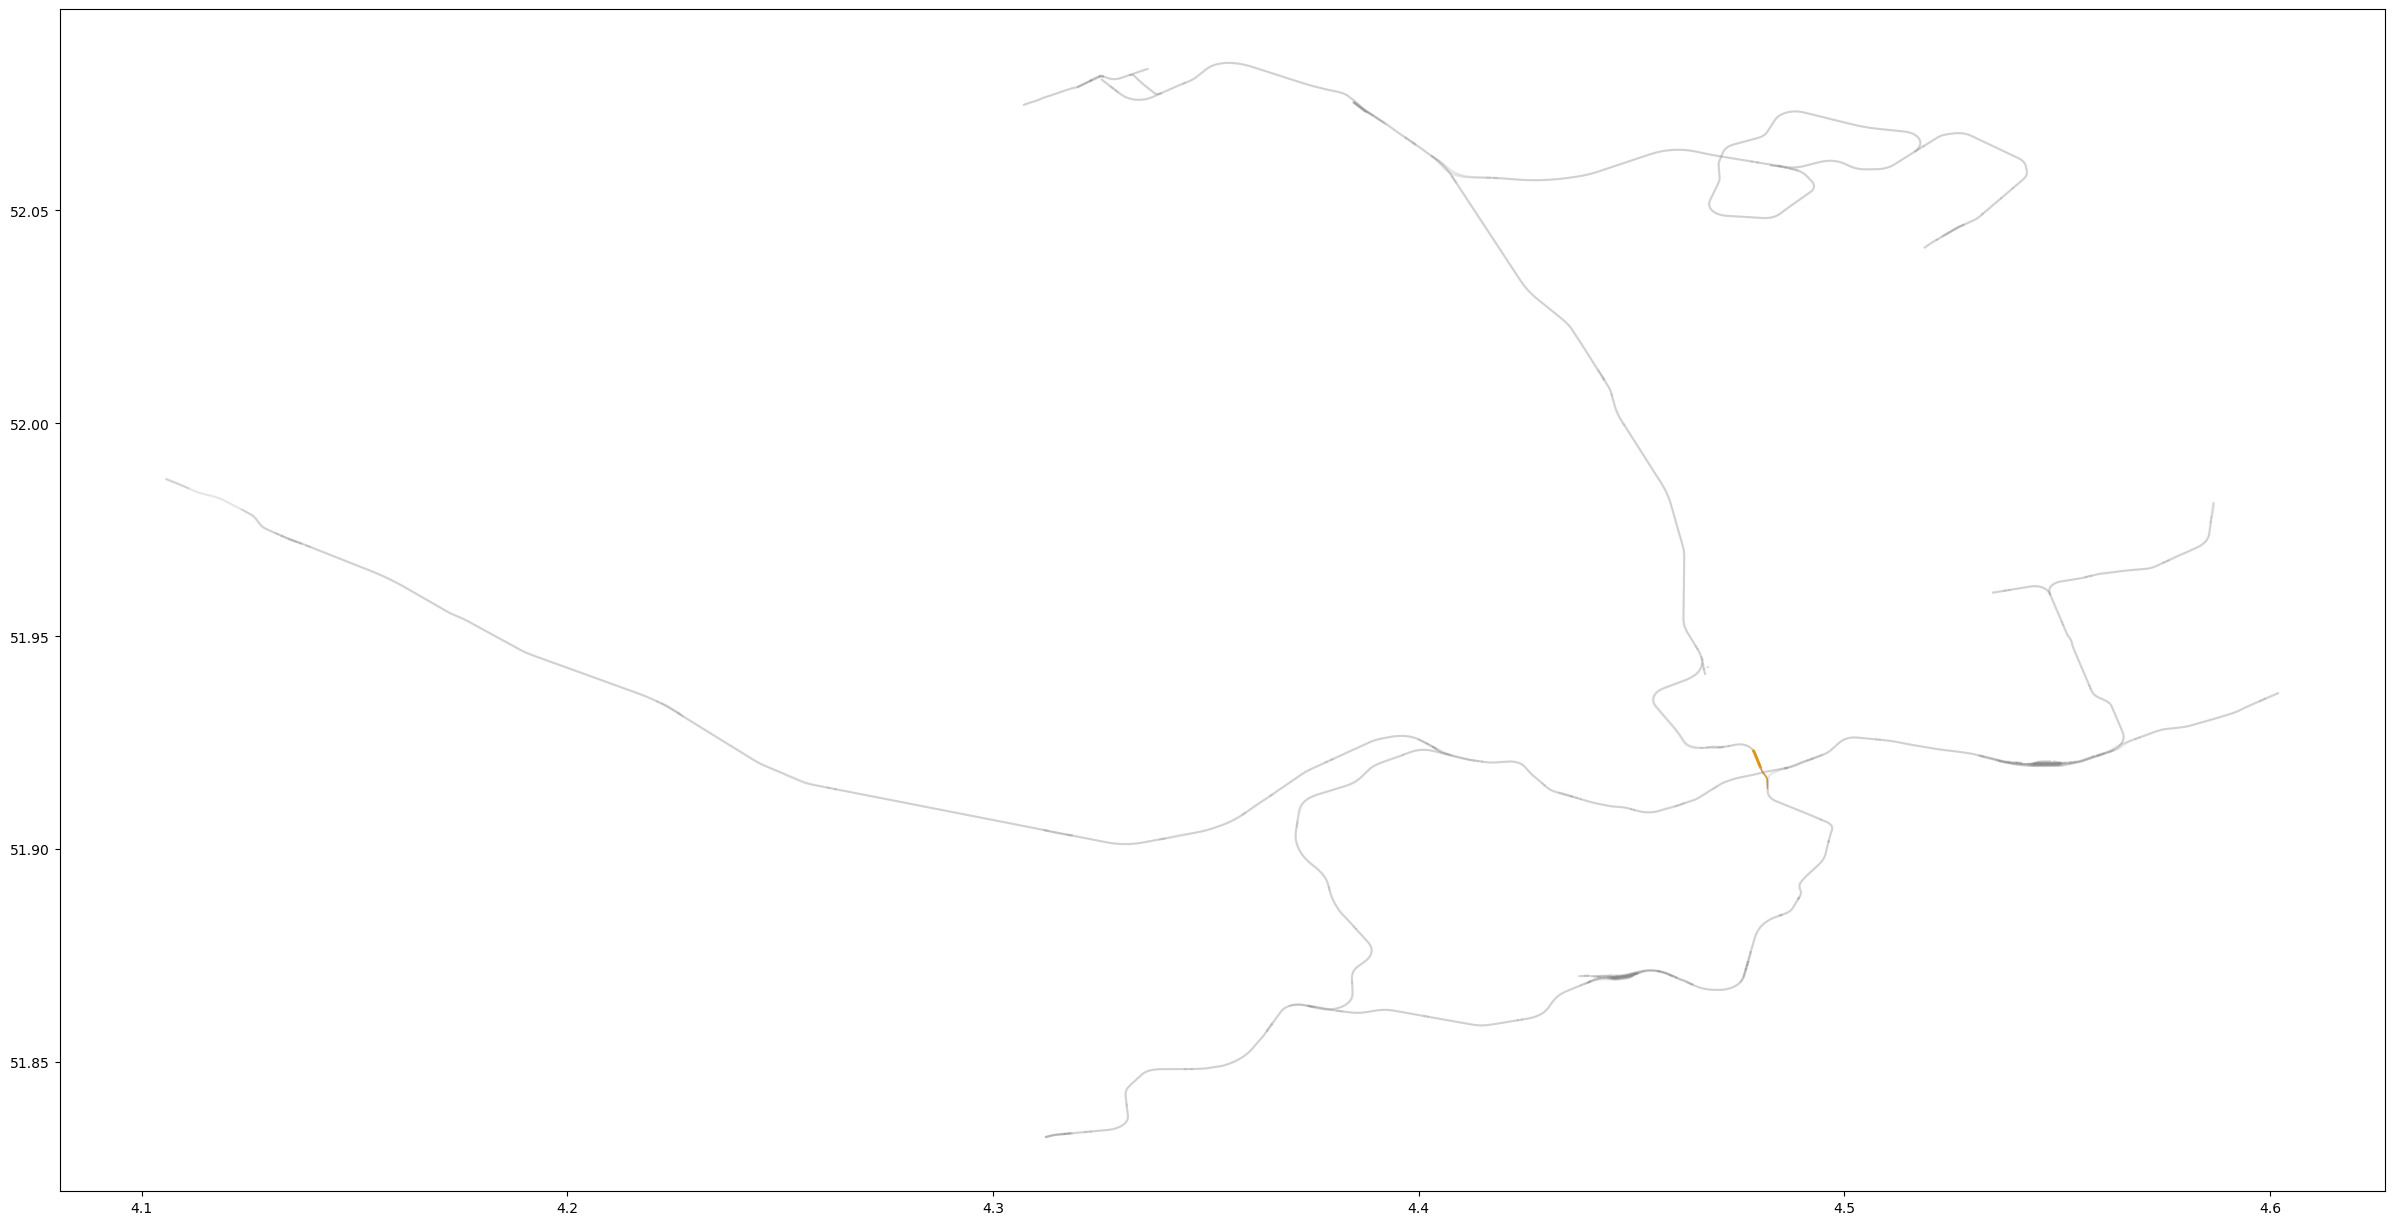

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way1.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way1.count_weight), color='orange')

In [47]:
s_station_df2 = find_nearest_station(start_node_coordinate, s_node_matched_all_stations_dict['Metro E: Den Haag Centraal => Slinge'])
s_station_df2

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
7,16,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4784926, 51.9232269)"


In [48]:
e_station_df2 = find_nearest_station(end_node_coordinate, e_node_matched_all_stations_dict['Metro E: Den Haag Centraal => Slinge'])
e_station_df2

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
5,15,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4819628, 51.914034)"


In [52]:
all_stations_way2 = s_node_matched_all_stations_dict['Metro E: Den Haag Centraal => Slinge']

In [53]:
s_index = s_station_df2.index[0]
e_index = e_station_df2.index[0]

In [54]:
s_e_between_stations_way2 = all_stations_way2.iloc[s_index:e_index-1:-1]  

In [55]:
s_e_between_stations_way2

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
7,16,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4784926, 51.9232269)"
6,18,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4803477, 51.9190178)"
5,15,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro E: Den Haag Centraal => Slinge,E,subway,"(4.4819628, 51.914034)"


In [58]:
s_e_between_nodes_way2 = sub_new_nodes.merge(s_e_between_stations_way2, on='coordinate_value', suffixes=('', '_drop'))
s_e_between_nodes_way2

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer,id_drop,name_drop,geometry_drop,geo_x_drop,geo_y_drop,route_name_list_drop,ref_drop,route_drop
0,POINT (4.48196 51.91403),2,1318,"(4.4819628, 51.914034)",Leuvehaven,4.481963,51.914034,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",15,Leuvehaven,POINT (4.4819628 51.914034),4.481963,51.914034,Metro E: Den Haag Centraal => Slinge,E,subway
1,POINT (4.47849 51.92323),2,1321,"(4.4784926, 51.9232269)",Stadhuis,4.478493,51.923227,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",16,Stadhuis,POINT (4.4784926 51.9232269),4.478493,51.923227,Metro E: Den Haag Centraal => Slinge,E,subway
2,POINT (4.48035 51.91902),2,1329,"(4.4803477, 51.9190178)",Beurs,4.480348,51.919018,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"(D, E)",18,Beurs,POINT (4.4803477 51.9190178),4.480348,51.919018,Metro E: Den Haag Centraal => Slinge,E,subway


In [59]:
id_pairs_way2 = pd.DataFrame(columns = ['s_id','e_id'])

for i in range(len(s_e_between_nodes_way2)-1):
    id_pairs_way2.loc[i,'s_id'] = s_e_between_nodes_way2.loc[i,'id']
    id_pairs_way2.loc[i,'e_id'] = s_e_between_nodes_way2.loc[i+1,'id']

id_pairs_way2

,s_id,e_id
0,1318,1321
1,1321,1329


## Test 0: Rotterdam 0

In [26]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.483305936774938, 
    's_coordinates_y': 51.91033987991742, 
    'e_coordinates_x': 4.471927555456692, 
    'e_coordinates_y': 51.94896547377741
} 

In [27]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [28]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
100,POINT (4.48202 51.91403),2,1317,Leuvehaven,4.482021,51.914034,"(4.4820214, 51.9140338)",Metro D: De Akkers => Rotterdam Centraal,subway,"D, E","D, E"


In [29]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
123,POINT (4.46470 51.94824),2,1374,Melanchthonweg,4.464698,51.948236,"(4.4646984, 51.9482363)",Metro E: Den Haag Centraal => Slinge,subway,E,None


### find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [30]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [31]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
6,2785504,subway,Rotterdam Centraal,Metro D: De Akkers => Rotterdam Centraal,D,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51..."
9,2777287,subway,Den Haag Centraal,Metro E: Slinge => Den Haag Centraal,E,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51..."


In [32]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
8,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52..."


### Make judgement of s_e_on_route_gdf

In [33]:
def judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf):   # version3
    s_on_route_ref = s_node_on_route_gdf[['ref']].reset_index(drop=True)
    e_on_route_ref = e_node_on_route_gdf[['ref']].reset_index(drop=True)

    length_s_on_route_ref = len(s_on_route_ref)
    length_e_on_route_ref = len(e_on_route_ref)

    if length_s_on_route_ref < 1:
        print("There is something wrong with function----s_e_on_route_gdf")

    
    elif length_s_on_route_ref == 1:
        if length_e_on_route_ref > 1:
            s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"None of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref

        elif length_e_on_route_ref == 1:
            if s_on_route_ref.equals(e_on_route_ref) == True:
                print(f"s_node and e_node are on one same route:{s_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find all stations between start_node and end_node, then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref
            else:
                print(f"s_node and e_node are on two different routes:{s_on_route_ref.loc[0,'ref']},{e_on_route_ref.loc[0,'ref']}")
                print(f"The next step is to find transfer station of {s_on_route_ref.loc[0,'ref']} and {e_on_route_ref.loc[0,'ref']}, then find all stations between start_node and end_node, finally calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref

        else:
            print("There is something wrong with function----s_e_on_route_gdf")


    else:
        s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
        if length_e_on_route_ref > 1:
            if s_e_on_route.duplicated().sum() == len(s_on_route_ref):
                print(f"s_node and e_node are on several same routes:{s_on_route_ref.ref.tolist()}\n")
                print("The next step is to find all stations between start_node and end_node on each route,then calculate shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref        
            elif s_e_on_route.duplicated().sum() == 0:
                print("Any of e_on_route is not the same as any of s_on_route")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            else:
                s_e_same_route = s_e_on_route[s_e_on_route['ref'].duplicated()]
                print(f"Some of e_on_route is the same as some of s_on_route:{s_e_same_route.ref.tolist()}\n")
                print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
                return s_on_route_ref, e_on_route_ref            
            
        elif length_e_on_route_ref == 1:
            if s_e_on_route.duplicated().sum() == 1:
                print(f"One of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref        
            else:
                print(f"None of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
                print("The next step is to find transfer stations of all s_on_route and e_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
                return s_on_route_ref, e_on_route_ref
        
        else:
            print("There is something wrong with function----s_e_on_route_gdf")

In [34]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

One of s_on_route is the same as e_on_route:E

The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''


In [35]:
s_on_route_ref

,ref
0,D
1,E


In [36]:
e_on_route_ref

,ref
0,E


In [34]:
s_on_route_ref = s_node_on_route_gdf[['ref']].reset_index(drop=True)
e_on_route_ref = e_node_on_route_gdf[['ref']].reset_index(drop=True)

In [35]:
s_on_route_ref

,ref
0,D
1,E


In [36]:
e_on_route_ref

,ref
0,E


In [37]:
e_on_route_ref.loc[0,'ref']

'E'

In [38]:
s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
s_e_on_route

,ref
0,D
1,E
2,E


In [39]:
s_on_route_ref.equals(e_on_route_ref)

False

In [40]:
length_s_on_route_ref = len(s_on_route_ref)
length_s_on_route_ref 

2

In [41]:
length_e_on_route_ref = len(e_on_route_ref)
length_e_on_route_ref

1

In [43]:
if length_s_on_route_ref < 1:
    print("There is something wrong with function----s_e_on_route_gdf")

    
elif length_s_on_route_ref == 1:
    if length_e_on_route_ref > 1:
        s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
        if s_e_on_route.duplicated().sum() == 1:
            print(f"One of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of the rest of e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
            
        else:
            print(f"None of e_on_route is the same as s_on_route:{s_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of all e_on_route and s_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")

    elif length_e_on_route_ref == 1:
        if s_on_route_ref.equals(e_on_route_ref) == True:
            print(f"s_node and e_node are on one same route:{s_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find all stations between start_node and end_node, then calculate shortest path----using function '' ")
            # s_e_nodes_on_route_gdf = s_node_on_route_gdf
            # print(s_e_nodes_on_route_gdf)
            # return s_e_nodes_on_route_gdf
            
        else:
            print(f"s_node and e_node are on two different routes:{s_on_route_ref.loc[0,'ref']},{e_on_route_ref.loc[0,'ref']}")
            print(f"The next step is to find transfer station of {s_on_route_ref.loc[0,'ref']} and {e_on_route_ref.loc[0,'ref']}, then find all stations between start_node and end_node, finally calculate shortest path----using function '' ")

    else:
        print("There is something wrong with function----s_e_on_route_gdf")


else:
    s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)
    if length_e_on_route_ref > 1:
        if s_e_on_route.duplicated().sum() == len(s_on_route_ref):
            print(f"s_node and e_node are on several same routes:{s_on_route_ref.ref.tolist()}\n")
            print("The next step is to find all stations between start_node and end_node on each route,then calculate shortest path----using function '' ")
        
        elif s_e_on_route.duplicated().sum() == 0:
            print("Any of e_on_route is not the same as any of s_on_route")
            print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
            
        else:
            s_e_same_route = s_e_on_route[s_e_on_route['ref'].duplicated()]
            print(f"Some of e_on_route is the same as some of s_on_route:{s_e_same_route.ref.tolist()}\n")
            print("The next step is to enumerate different transfer routes through permutation and combination, obtain all transfer stations, then find all stations between the start node/transfer stations/end node, and finally calculate the shortest path----using function '' ")
            
            
    elif length_e_on_route_ref == 1:
        if s_e_on_route.duplicated().sum() == 1:
            print(f"One of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''")
        
        else:
            print(f"None of s_on_route is the same as e_on_route:{e_on_route_ref.loc[0,'ref']}\n")
            print("The next step is to find transfer stations of all s_on_route and e_on_route, then find all stations between start_node/tansfer stations/end_node, finally calculate shortest path----using function ''")
    else:
        print("There is something wrong with function----s_e_on_route_gdf")

One of s_on_route is the same as e_on_route:E

The next step is to find transfer stations of the rest of s_on_route and e_on_route, then find all stations between start_node, tansfer stations and end_node, finally calculate shortest path----using function ''


In [50]:
s_e_on_route = pd.concat([s_on_route_ref,e_on_route_ref],ignore_index=True)

In [51]:
s_e_on_route[s_e_on_route.duplicated()==False]

,ref
0,D
1,E


In [59]:
data = {'ref': ['D', 'E', 'F','D', 'E', 'A']}
df = pd.DataFrame(data)

# 使用duplicated()函数查找重复行，并使用sum()计算重复元素的个数
duplicate_count = df.duplicated().sum()

print("重复元素个数:", duplicate_count)

重复元素个数: 2


In [65]:
df

,ref
0,D
1,E
2,F
3,D
4,E
5,A


In [60]:
df.ref.tolist() 

['D', 'E', 'F', 'D', 'E', 'A']

In [64]:
df3 = df.drop_duplicates()
df3

,ref
0,D
1,E
2,F
5,A


In [67]:
data = {'ref': ['D', 'E', 'F', 'D', 'E', 'A']}
df = pd.DataFrame(data)

# 使用duplicated方法找到重复的元素
duplicated_elements = df[df['ref'].duplicated()]

# 构建新的 DataFrame
new_df = duplicated_elements[['ref']].copy()

In [69]:
df['ref'].duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
Name: ref, dtype: bool

In [68]:
duplicated_elements

,ref
3,D
4,E


In [33]:
s_e_nodes_on_route_gdf = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

NameError: name 'judge_on_route' is not defined

In [35]:
s_e_nodes_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry,s_or_e
0,2785504,subway,Rotterdam Centraal,Metro D: De Akkers => Rotterdam Centraal,D,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51...",s
1,2777287,subway,Den Haag Centraal,Metro E: Slinge => Den Haag Centraal,E,Rail Rotterdam,None,"MULTILINESTRING ((4.47052 51.92395, 4.47044 51...",s
2,2777286,subway,Slinge,Metro E: Den Haag Centraal => Slinge,E,Rail Rotterdam,None,"MULTILINESTRING ((4.32649 52.07994, 4.32529 52...",e


### get the nearst stations of s_e nodes

### get all stations between s_e stations

### get all nodes and id_pairs of nodes between s_e nodes

### calculate shortest path and plot

## Test 2: Rotterdam 2 - NO need to transfer, on 3 same routes

In [62]:
s_e_coordinates_t2 = {
    's_coordinates_x': 4.449333627637281, 
    's_coordinates_y': 51.90933928551807, 
    'e_coordinates_x': 4.499070490137936, 
    'e_coordinates_y': 51.92423738222505
} 

In [63]:
start_node, end_node = s_e_node_df(s_e_coordinates_t2, sub_new_nodes_df)

In [64]:
start_node

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer
1361,POINT (4.44572 51.91000),2,1361,"(4.4457184, 51.9099984)",Delfshaven,4.445718,51.909998,"Metro A: Binnenhof => Vlaardingen West, Metro ...","A, B, C",subway,"(A, B, C)"


In [65]:
end_node

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer
1319,POINT (4.49702 51.92335),2,1319,"(4.4970223, 51.9233516)",Oostplein,4.497022,51.923352,"Metro A: Vlaardingen West => Binnenhof, Metro ...","A, B, C",subway,"(A, B, C)"


### find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [66]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [67]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
2,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
5,2785677,subway,De Akkers,Metro C: De Terp => De Akkers,C,Rail Rotterdam,None,"MULTILINESTRING ((4.59945 51.93557, 4.59948 51..."


In [68]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
3,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
4,2785676,subway,De Terp,Metro C: De Akkers => De Terp,C,Rail Rotterdam,None,"MULTILINESTRING ((4.31898 51.83329, 4.31899 51..."


In [69]:
s_node_on_route_gdf['ref']

0    A
2    B
5    C
Name: ref, dtype: object

In [70]:
e_node_on_route_gdf['ref']

1    A
3    B
4    C
Name: ref, dtype: object

In [71]:
s_node_on_route_gdf['ref'].equals(e_node_on_route_gdf['ref'])

False

In [72]:
s_node_on_route_gdf_reset = s_node_on_route_gdf['ref'].reset_index(drop=True)
e_node_on_route_gdf_reset = e_node_on_route_gdf['ref'].reset_index(drop=True)
result = s_node_on_route_gdf_reset.equals(e_node_on_route_gdf_reset)
print(result)

True


In [73]:
s_node_on_route_gdf_reset

0    A
1    B
2    C
Name: ref, dtype: object

In [74]:
e_node_on_route_gdf_reset

0    A
1    B
2    C
Name: ref, dtype: object

### Make judgement of s_e_on_route_gdf

In [75]:
s_e_nodes_on_route_gdf = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

s_node and e_node are on 3 same routes


In [76]:
s_e_nodes_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
2,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
5,2785677,subway,De Akkers,Metro C: De Terp => De Akkers,C,Rail Rotterdam,None,"MULTILINESTRING ((4.59945 51.93557, 4.59948 51..."


### get the nearst stations of s_e nodes

### get all stations between s_e stations

### get all nodes and id_pairs of nodes between s_e nodes

### calculate shortest path and plot

## Add columns to nodes--try to revise version1 failed

In [12]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [13]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x      geo_y
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087  51.903822
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566  51.903182
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506  51.910139
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189  51.922675
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662  51.921774
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827  51.913281
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718  51.909998
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247  51.909546
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097  51.912249
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   51.91635
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369    51.917

In [14]:
sub_routes = sub_routes[sub_routes['name'].isin(selected_routes)].reset_index(drop=True)

In [15]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [16]:
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x  \
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087   
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566   
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506   
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189   
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662   
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827   
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718   
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247   
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097   
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369   
 11   2                Blaak  POINT (4.4890906 51.9200477)  4.489091   
 12   5            Oos

In [17]:
aggregation_functions = {
    'name': 'first',
    # 'coordinate_value': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [18]:
# sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [19]:
# def add_columns_to_nodes(order_route_dict, aggregation_functions, nodes):
        
#     for key, df in order_route_dict.items():
#         new_df = create_tuple_column(df)
#         order_route_dict[key] = new_df
        
#     order_route_stations_df = pd.concat(order_route_dict.values()).reset_index(drop=True)
#     new_order_route_stations_df = order_route_stations_df.groupby('coordinate_value').agg(aggregation_functions).reset_index()
#     new_nodes = pd.merge(nodes, new_order_route_stations_df, on='geometry', how='outer')
#     new_nodes['transfer'] = new_nodes['ref'].apply(check_ref)
#     new_nodes['transfer'] = new_nodes['transfer'].apply(check_transfer)
    
#     new_nodes_gdf = gpd.GeoDataFrame(new_nodes.copy())
#     new_nodes_gdf['geo_x'] = new_nodes_gdf.geometry.x
#     new_nodes_gdf['geo_y'] = new_nodes_gdf.geometry.y
#     new_nodes_gdf['coordinate_value'] = list(zip(new_nodes_gdf['geo_x'], new_nodes_gdf['geo_y']))
#     new_nodes = new_nodes_gdf
#     new_nodes = new_nodes.dropna(subset=['name'])
    
#     return new_nodes

In [20]:
# for key, df in order_route_dict.items():
#     new_df = create_tuple_column(df)
#     order_route_dict[key] = new_df
    
# order_route_stations_df = pd.concat(order_route_dict.values()).reset_index(drop=True)
# new_order_route_stations_df = order_route_stations_df.groupby('coordinate_value').agg(aggregation_functions).reset_index()

In [21]:
for key, df in sub_order_route_dict.items():
        new_df = create_tuple_column(df)
        sub_order_route_dict[key] = new_df

sub_order_route_stations_df = pd.concat(sub_order_route_dict.values()).reset_index(drop=True)
# sub_order_route_stations_df.to_excel('./sub_order_route_stations_df1.xlsx',header=True,index=False)
# sub_order_route_stations_df = sub_order_route_stations_df.drop_duplicates(subset='coordinate_value')
# sub_order_route_stations_df.to_excel('./sub_order_route_stations_df2.xlsx',header=True,index=False)
sub_new_order_route_stations_df = sub_order_route_stations_df.groupby('coordinate_value').agg(aggregation_functions).reset_index()
sub_new_order_route_stations_df

,coordinate_value,name,geometry,geo_x,geo_y,route_name_list,ref,route
0,"(4.1056731, 51.9868574)",Hoek van Holland Strand,POINT (4.1056731 51.9868574),4.105673,51.986857,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1,"(4.1057812, 51.9869455)",Hoek van Holland Strand,POINT (4.1057812 51.9869455),4.105781,51.986945,Metro B: Nesselande => Hoek van Holland Strand,B,subway
2,"(4.1273157, 51.9770415)",Hoek van Holland Haven,POINT (4.1273157 51.9770415),4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway
3,"(4.1275874, 51.9764225)",Hoek van Holland Haven,POINT (4.1275874 51.9764225),4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway
4,"(4.2246083, 51.9326957)",Steendijkpolder,POINT (4.2246083 51.9326957),4.224608,51.932696,Metro B: Hoek van Holland Strand => Nesselande,B,subway
...,...,...,...,...,...,...,...,...
146,"(4.5866641, 51.9796734)",Nesselande,POINT (4.5866641 51.9796734),4.586664,51.979673,Metro B: Hoek van Holland Strand => Nesselande,B,subway
147,"(4.5895479, 51.931394)",Capelle Centrum,POINT (4.5895479 51.931394),4.589548,51.931394,Metro C: De Terp => De Akkers,C,subway
148,"(4.5895721, 51.9313618)",Capelle Centrum,POINT (4.5895721 51.9313618),4.589572,51.931362,Metro C: De Akkers => De Terp,C,subway
149,"(4.600555, 51.9360939)",De Terp,POINT (4.600555 51.9360939),4.600555,51.936094,Metro C: De Terp => De Akkers,C,subway


In [22]:
# sub_new_order_route_stations_df.to_excel('./sub_new_order_route_stations_df2drop.xlsx',header=True,index=False)

In [23]:
sub_new_order_route_stations_df.to_excel('./sub_new_order_route_stations_df1.xlsx',header=True,index=False)

In [24]:
sub_new_nodes = pd.merge(nodes, sub_new_order_route_stations_df, on='geometry', how='outer')
sub_new_nodes_gdf = gpd.GeoDataFrame(sub_new_nodes.copy())
sub_new_nodes_gdf['geo_x'] = sub_new_nodes_gdf.geometry.x
sub_new_nodes_gdf['geo_y'] = sub_new_nodes_gdf.geometry.y
sub_new_nodes_gdf['coordinate_value'] = list(zip(sub_new_nodes_gdf['geo_x'], sub_new_nodes_gdf['geo_y']))
sub_new_nodes = sub_new_nodes_gdf
sub_new_nodes = sub_new_nodes.dropna(subset=['name'])
sub_new_nodes

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route
5,POINT (4.39401 51.92120),2,5,"(4.3940136, 51.921202)",Parkweg,4.394014,51.921202,Metro C: De Akkers => De Terp,C,subway
10,POINT (4.49677 51.90359),2,10,"(4.4967671, 51.9035882)",Rijnhaven,4.496767,51.903588,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway
36,POINT (4.39579 51.86171),2,36,"(4.3957852, 51.8617079)",Poortugaal,4.395785,51.861708,Metro D: De Akkers => Rotterdam Centraal,D,subway
45,POINT (4.41950 51.85912),2,45,"(4.4194958, 51.8591157)",Rhoon,4.419496,51.859116,Metro D: De Akkers => Rotterdam Centraal,D,subway
89,POINT (4.31990 51.83328),2,89,"(4.3199021, 51.8332768)",De Akkers,4.319902,51.833277,"Metro C: De Akkers => De Terp, Metro D: De Akk...","C, D",subway
...,...,...,...,...,...,...,...,...,...,...
1386,POINT (4.31503 51.90372),2,1386,"(4.3150312, 51.9037243)",Vlaardingen West,4.315031,51.903724,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1387,POINT (4.23521 51.92617),2,1387,"(4.2352056, 51.9261681)",Maassluis West,4.235206,51.926168,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1388,POINT (4.12759 51.97642),2,1388,"(4.1275874, 51.9764225)",Hoek van Holland Haven,4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway
1389,POINT (4.12732 51.97704),2,1389,"(4.1273157, 51.9770415)",Hoek van Holland Haven,4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway


In [25]:
sub_new_nodes.to_excel('./sub_new_nodes906_1.xlsx',header=True,index=False)

In [26]:
# add_transfer_to_new_nodes

In [27]:
nodes_ref_transfer = sub_new_nodes.copy()
nodes_ref_transfer = nodes_ref_transfer[['name','ref']]
nodes_ref_transfer = nodes_ref_transfer.drop_duplicates()
nodes_ref_transfer.reset_index(drop=True,inplace=True)
nodes_ref_transfer = nodes_ref_transfer.groupby('name').agg({'ref': lambda x: ', '.join(x)})
nodes_ref_transfer.reset_index(inplace=True)
nodes_ref_transfer

,name,ref
0,Alexander,"A, B"
1,Ambachtsland,B
2,Berkel Westpolder,E
3,Beurs,"A, B, C, D, E"
4,Binnenhof,A
...,...,...
66,Voorburg 't Loo,E
67,Voorschoterlaan,"A, B, C"
68,Wilhelminaplein,"D, E"
69,Zalmplaat,"C, D"


In [28]:
sub_new_nodes = pd.merge(sub_new_nodes, nodes_ref_transfer, on='name', how='left')
sub_new_nodes

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref_x,route,ref_y
0,POINT (4.39401 51.92120),2,5,"(4.3940136, 51.921202)",Parkweg,4.394014,51.921202,Metro C: De Akkers => De Terp,C,subway,C
1,POINT (4.49677 51.90359),2,10,"(4.4967671, 51.9035882)",Rijnhaven,4.496767,51.903588,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"D, E"
2,POINT (4.39579 51.86171),2,36,"(4.3957852, 51.8617079)",Poortugaal,4.395785,51.861708,Metro D: De Akkers => Rotterdam Centraal,D,subway,D
3,POINT (4.41950 51.85912),2,45,"(4.4194958, 51.8591157)",Rhoon,4.419496,51.859116,Metro D: De Akkers => Rotterdam Centraal,D,subway,D
4,POINT (4.31990 51.83328),2,89,"(4.3199021, 51.8332768)",De Akkers,4.319902,51.833277,"Metro C: De Akkers => De Terp, Metro D: De Akk...","C, D",subway,"C, D"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.31503 51.90372),2,1386,"(4.3150312, 51.9037243)",Vlaardingen West,4.315031,51.903724,Metro B: Hoek van Holland Strand => Nesselande,B,subway,"A, A, B"
147,POINT (4.23521 51.92617),2,1387,"(4.2352056, 51.9261681)",Maassluis West,4.235206,51.926168,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B
148,POINT (4.12759 51.97642),2,1388,"(4.1275874, 51.9764225)",Hoek van Holland Haven,4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B
149,POINT (4.12732 51.97704),2,1389,"(4.1273157, 51.9770415)",Hoek van Holland Haven,4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway,B


In [29]:
sub_new_nodes.to_excel('./sub_new_nodes906_2.xlsx',header=True,index=False)

In [30]:
sub_new_nodes['transfer'] = sub_new_nodes['ref_y'].apply(check_ref)
sub_new_nodes['transfer'] = sub_new_nodes['transfer'].apply(check_transfer)

In [31]:
sub_new_nodes

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref_x,route,ref_y,transfer
0,POINT (4.39401 51.92120),2,5,"(4.3940136, 51.921202)",Parkweg,4.394014,51.921202,Metro C: De Akkers => De Terp,C,subway,C,None
1,POINT (4.49677 51.90359),2,10,"(4.4967671, 51.9035882)",Rijnhaven,4.496767,51.903588,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway,"D, E","(D, E)"
2,POINT (4.39579 51.86171),2,36,"(4.3957852, 51.8617079)",Poortugaal,4.395785,51.861708,Metro D: De Akkers => Rotterdam Centraal,D,subway,D,None
3,POINT (4.41950 51.85912),2,45,"(4.4194958, 51.8591157)",Rhoon,4.419496,51.859116,Metro D: De Akkers => Rotterdam Centraal,D,subway,D,None
4,POINT (4.31990 51.83328),2,89,"(4.3199021, 51.8332768)",De Akkers,4.319902,51.833277,"Metro C: De Akkers => De Terp, Metro D: De Akk...","C, D",subway,"C, D","(C, D)"
...,...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.31503 51.90372),2,1386,"(4.3150312, 51.9037243)",Vlaardingen West,4.315031,51.903724,Metro B: Hoek van Holland Strand => Nesselande,B,subway,"A, A, B","(A, A, B)"
147,POINT (4.23521 51.92617),2,1387,"(4.2352056, 51.9261681)",Maassluis West,4.235206,51.926168,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B,None
148,POINT (4.12759 51.97642),2,1388,"(4.1275874, 51.9764225)",Hoek van Holland Haven,4.127587,51.976422,Metro B: Hoek van Holland Strand => Nesselande,B,subway,B,None
149,POINT (4.12732 51.97704),2,1389,"(4.1273157, 51.9770415)",Hoek van Holland Haven,4.127316,51.977041,Metro B: Nesselande => Hoek van Holland Strand,B,subway,B,None


In [32]:
sub_new_nodes.to_excel('./sub_new_nodes907.xlsx',header = True, index = False)

## Add columns to nodes--try to revise version2 successed

In [12]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [13]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x      geo_y
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087  51.903822
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566  51.903182
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506  51.910139
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189  51.922675
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662  51.921774
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827  51.913281
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718  51.909998
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247  51.909546
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097  51.912249
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   51.91635
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369    51.917

In [14]:
sub_routes = sub_routes[sub_routes['name'].isin(selected_routes)].reset_index(drop=True)

In [15]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [16]:
sub_order_route_dict

{'Metro A: Binnenhof => Vlaardingen West':     id                 name                      geometry     geo_x  \
 0   47     Vlaardingen West  POINT (4.3150875 51.9038216)  4.315087   
 1    0  Vlaardingen Centrum  POINT (4.3435659 51.9031818)  4.343566   
 2    1     Vlaardingen Oost  POINT (4.3615059 51.9101388)  4.361506   
 3   22   Schiedam Nieuwland  POINT (4.3831887 51.9226748)  4.383189   
 4   16     Schiedam Centrum  POINT (4.4086615 51.9217737)  4.408662   
 5   45         Marconiplein  POINT (4.4328269 51.9132807)  4.432827   
 6   44           Delfshaven  POINT (4.4457184 51.9099984)  4.445718   
 7   43            Coolhaven  POINT (4.4582471 51.9095462)  4.458247   
 8   18             Dijkzigt  POINT (4.4660974 51.9122493)  4.466097   
 9   17      Eendrachtsplein  POINT (4.4737244 51.9163496)  4.473724   
 10   7                Beurs  POINT (4.4803692 51.9178996)  4.480369   
 11   2                Blaak  POINT (4.4890906 51.9200477)  4.489091   
 12   5            Oos

In [18]:
for key, df in sub_order_route_dict.items():
        new_df = create_tuple_column(df)
        sub_order_route_dict[key] = new_df

sub_order_route_stations_df = pd.concat(sub_order_route_dict.values()).reset_index(drop=True)
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add0.xlsx',header=True,index=False)

In [19]:
stations_name_ref = sub_order_route_stations_df.copy()
stations_name_ref = stations_name_ref[['name','ref']]
stations_name_ref.to_excel('./stations_name_ref.xlsx',header=True,index=False)

In [20]:
stations_name_ref = stations_name_ref.drop_duplicates()
stations_name_ref

,name,ref
0,Vlaardingen West,A
1,Vlaardingen Centrum,A
2,Vlaardingen Oost,A
3,Schiedam Nieuwland,A
4,Schiedam Centrum,A
...,...,...
216,Forepark,E
217,Leidschendam-Voorburg,E
218,Voorburg 't Loo,E
219,Den Haag Laan van NOI,E


In [21]:
stations_name_ref.reset_index(drop=True,inplace=True)
stations_name_ref = stations_name_ref.groupby('name').agg({'ref': lambda x: ', '.join(x)})
stations_name_ref.reset_index(inplace=True)
stations_name_ref

,name,ref
0,Alexander,"A, B"
1,Ambachtsland,B
2,Berkel Westpolder,E
3,Beurs,"A, B, C, D, E"
4,Binnenhof,A
...,...,...
66,Voorburg 't Loo,E
67,Voorschoterlaan,"A, B, C"
68,Wilhelminaplein,"D, E"
69,Zalmplaat,"C, D"


In [22]:
sub_order_route_stations_df = pd.merge(sub_order_route_stations_df, stations_name_ref, on='name', how='left')
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref_x,route,coordinate_value,ref_y
0,47,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3150875, 51.9038216)","A, B"
1,0,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3435659, 51.9031818)","A, B"
2,1,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3615059, 51.9101388)","A, B"
3,22,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3831887, 51.9226748)","A, B"
4,16,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.4086615, 51.9217737)","A, B, C"
...,...,...,...,...,...,...,...,...,...,...
239,16,Wilhelminaplein,POINT (4.4925955 51.9077405),4.492596,51.907741,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4925955, 51.9077405)","D, E"
240,19,Rijnhaven,POINT (4.4968239 51.90358),4.496824,51.90358,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4968239, 51.90358)","D, E"
241,2,Maashaven,POINT (4.4947847 51.8971895),4.494785,51.89719,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4947847, 51.8971895)","D, E"
242,18,Zuidplein,POINT (4.4883544 51.8868895),4.488354,51.88689,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4883544, 51.8868895)","D, E"


In [23]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add1.xlsx',header=True,index=False)

In [24]:
sub_order_route_stations_df = sub_order_route_stations_df.drop_duplicates(subset='coordinate_value').reset_index(drop=True)
sub_order_route_stations_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref_x,route,coordinate_value,ref_y
0,47,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3150875, 51.9038216)","A, B"
1,0,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3435659, 51.9031818)","A, B"
2,1,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3615059, 51.9101388)","A, B"
3,22,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.3831887, 51.9226748)","A, B"
4,16,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,Metro A: Binnenhof => Vlaardingen West,A,subway,"(4.4086615, 51.9217737)","A, B, C"
...,...,...,...,...,...,...,...,...,...,...
146,12,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4608735, 51.9754027)",E
147,8,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4622518, 51.955892)",E
148,20,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4644824, 51.9486955)",E
149,7,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,Metro E: Slinge => Den Haag Centraal,E,subway,"(4.4582602, 51.9306444)",E


In [25]:
sub_order_route_stations_df.to_excel('./sub_order_route_stations_df_add2.xlsx',header=True,index=False)

In [26]:
sub_order_route_stations_df = sub_order_route_stations_df[['name','geometry','geo_x','geo_y','coordinate_value','route_name_list','route','ref_y']]
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref_y
0,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...
146,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [27]:
sub_order_route_stations_df.rename(columns={'ref_y': 'ref'}, inplace=True)
sub_order_route_stations_df

,name,geometry,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,Vlaardingen West,POINT (4.3150875 51.9038216),4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,Vlaardingen Centrum,POINT (4.3435659 51.9031818),4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,Vlaardingen Oost,POINT (4.3615059 51.9101388),4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,Schiedam Nieuwland,POINT (4.3831887 51.9226748),4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,Schiedam Centrum,POINT (4.4086615 51.9217737),4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...
146,Rodenrijs,POINT (4.4608735 51.9754027),4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,Meijersplein / Airport,POINT (4.4622518 51.955892),4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,Melanchthonweg,POINT (4.4644824 51.9486955),4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,Blijdorp,POINT (4.4582602 51.9306444),4.45826,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [28]:
sub_new_nodes = pd.merge(nodes, sub_order_route_stations_df, on='geometry', how='right')
sub_new_nodes_gdf = gpd.GeoDataFrame(sub_new_nodes.copy())
sub_new_nodes_gdf['geo_x'] = sub_new_nodes_gdf.geometry.x
sub_new_nodes_gdf['geo_y'] = sub_new_nodes_gdf.geometry.y
sub_new_nodes_gdf['coordinate_value'] = list(zip(sub_new_nodes_gdf['geo_x'], sub_new_nodes_gdf['geo_y']))
sub_new_nodes = sub_new_nodes_gdf
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C"
...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E


In [29]:
sub_new_nodes['transfer'] = None
def fill_transfer(row):
    if ',' in row['ref']:
        return row['ref']
    else:
        return None

sub_new_nodes['transfer'] = sub_new_nodes.apply(fill_transfer, axis=1)

In [30]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","A, B"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","A, B, C"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [31]:
sub_new_nodes.to_excel('./sub_new_nodes911.xlsx',header = True, index = False)

In [31]:
# add_transfer(tuple)_to_new_nodes

In [32]:
sub_new_nodes['transfer'] = sub_new_nodes['ref'].apply(check_ref)
sub_new_nodes['transfer'] = sub_new_nodes['transfer'].apply(check_transfer)

In [33]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.31509 51.90382),2,1108,Vlaardingen West,4.315087,51.903822,"(4.3150875, 51.9038216)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
1,POINT (4.34357 51.90318),2,1280,Vlaardingen Centrum,4.343566,51.903182,"(4.3435659, 51.9031818)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
2,POINT (4.36151 51.91014),2,1281,Vlaardingen Oost,4.361506,51.910139,"(4.3615059, 51.9101388)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
3,POINT (4.38319 51.92267),2,966,Schiedam Nieuwland,4.383189,51.922675,"(4.3831887, 51.9226748)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B","(A, B)"
4,POINT (4.40866 51.92177),2,670,Schiedam Centrum,4.408662,51.921774,"(4.4086615, 51.9217737)",Metro A: Binnenhof => Vlaardingen West,subway,"A, B, C","(A, B, C)"
...,...,...,...,...,...,...,...,...,...,...,...
146,POINT (4.46087 51.97540),2,1308,Rodenrijs,4.460873,51.975403,"(4.4608735, 51.9754027)",Metro E: Slinge => Den Haag Centraal,subway,E,None
147,POINT (4.46225 51.95589),2,1300,Meijersplein / Airport,4.462252,51.955892,"(4.4622518, 51.955892)",Metro E: Slinge => Den Haag Centraal,subway,E,None
148,POINT (4.46448 51.94870),2,1375,Melanchthonweg,4.464482,51.948695,"(4.4644824, 51.9486955)",Metro E: Slinge => Den Haag Centraal,subway,E,None
149,POINT (4.45826 51.93064),2,1299,Blijdorp,4.458260,51.930644,"(4.4582602, 51.9306444)",Metro E: Slinge => Den Haag Centraal,subway,E,None


In [34]:
sub_new_nodes.to_excel('./sub_new_nodes911_1.xlsx',header = True, index = False)

## Add columns to edges--no revise

In [35]:
sub_shortest_path_edges = {key: sub_shortest_path_edges[key] for key in selected_routes}

In [36]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [37]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [38]:
aggregation_functions = {
    'geometry': 'first',
    # 'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [39]:
sub_new_edges =  add_columns_to_edges(sub_shortest_path_edges, aggregation_functions, sub_edges)

In [40]:
sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,ref,route
0,6305896,"LINESTRING (4.5164659 52.0638003, 4.5158864 52...",light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN
1,6305933,"LINESTRING (4.403601 52.0622859, 4.4037107 52....",light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN
2,6307148,"LINESTRING (4.3767271 51.9129032, 4.3777532 51...",subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",Metro C: De Akkers => De Terp,C,subway
3,6307148,"LINESTRING (4.384684 51.9155218, 4.3847438 51....",subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",Metro C: De Akkers => De Terp,C,subway
4,6307235,"LINESTRING (4.371436 51.9054786, 4.3714573 51....",subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)","Metro C: De Akkers => De Terp, Metro C: De Ter...","C, C",subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,"LINESTRING (4.440498 52.015125, 4.4403605 52.0...",light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",Metro E: Slinge => Den Haag Centraal,E,subway
1575,1162431256,"LINESTRING (4.4369993 52.0205733, 4.4367535 52...",light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",Metro E: Slinge => Den Haag Centraal,E,subway
1576,1162431257,"LINESTRING (4.4404337 52.0151102, 4.4404524 52...",light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",Metro E: Den Haag Centraal => Slinge,E,subway
1577,1162431262,"LINESTRING (4.4405164 52.0150958, 4.440498 52....",light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",Metro E: Slinge => Den Haag Centraal,E,subway


## Add columns to edges--try to revise version successed

In [20]:
sub_shortest_path_edges = {key: sub_shortest_path_edges[key] for key in selected_routes}

In [21]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [22]:
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [39]:
sub_shortest_path_edges_df = pd.concat(sub_shortest_path_edges.values()).reset_index(drop=True)

In [40]:
sub_shortest_path_edges_df

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,ref,route
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,184173356,"LINESTRING (4.4867855 51.885111, 4.4868814 51....",subway,None,268,250,1372,228.183251,0.009127,228,"(250, 1372)","(1372, 250)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway
1355,309656219,"LINESTRING (4.4780641 51.8759905, 4.4782056 51...",subway,None,906,838,1209,1082.253187,0.043290,1082,"(838, 1209)","(1209, 838)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway
1356,309656219,"LINESTRING (4.4847378 51.8843139, 4.4848126 51...",subway,None,907,1209,1207,54.353582,0.002174,54,"(1209, 1207)","(1207, 1209)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway
1357,309656219,"LINESTRING (4.485427 51.8845523, 4.4858518 51....",subway,None,908,1207,250,112.491968,0.004500,112,"(1207, 250)","(250, 1207)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway


In [41]:
sub_shortest_path_edges_df.to_excel('./sub_shortest_path_edges_df_add1.xlsx',header=True,index=False)

In [42]:
edges_id_ref = sub_shortest_path_edges_df.copy()
edges_id_ref = edges_id_ref[['id','ref']]
edges_id_ref

,id,ref
0,1155,A
1,1156,A
2,1297,A
3,1318,A
4,1320,A
...,...,...
1354,268,E
1355,906,E
1356,907,E
1357,908,E


In [43]:
edges_id_ref = edges_id_ref.drop_duplicates()
edges_id_ref

,id,ref
0,1155,A
1,1156,A
2,1297,A
3,1318,A
4,1320,A
...,...,...
1351,270,E
1352,271,E
1354,268,E
1356,907,E


In [44]:
edges_id_ref.reset_index(drop=True,inplace=True)
edges_id_ref = edges_id_ref.groupby('id').agg({'ref': lambda x: ', '.join(x)})
edges_id_ref.reset_index(inplace=True)
edges_id_ref

,id,ref
0,2,C
1,3,C
2,4,C
3,5,C
4,6,C
...,...,...
842,1574,E
843,1575,E
844,1576,E
845,1577,E


In [45]:
sub_shortest_path_edges_df = pd.merge(sub_shortest_path_edges_df, edges_id_ref, on='id', how='left')
sub_shortest_path_edges_df

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,ref_x,route,ref_y
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,184173356,"LINESTRING (4.4867855 51.885111, 4.4868814 51....",subway,None,268,250,1372,228.183251,0.009127,228,"(250, 1372)","(1372, 250)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"
1355,309656219,"LINESTRING (4.4780641 51.8759905, 4.4782056 51...",subway,None,906,838,1209,1082.253187,0.043290,1082,"(838, 1209)","(1209, 838)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"
1356,309656219,"LINESTRING (4.4847378 51.8843139, 4.4848126 51...",subway,None,907,1209,1207,54.353582,0.002174,54,"(1209, 1207)","(1207, 1209)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"
1357,309656219,"LINESTRING (4.485427 51.8845523, 4.4858518 51....",subway,None,908,1207,250,112.491968,0.004500,112,"(1207, 250)","(250, 1207)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,"D, E"


In [46]:
sub_shortest_path_edges_df = sub_shortest_path_edges_df.drop_duplicates(subset = 'id').reset_index(drop=True)
sub_shortest_path_edges_df

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,ref_x,route,ref_y
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,"A, B"
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,A,subway,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,207198645,"LINESTRING (4.4697452 51.9240398, 4.4696126 51...",subway,None,509,1309,491,167.123753,0.006685,167,"(1309, 491)","(491, 1309)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E
843,207198652,"LINESTRING (4.4668323 51.9237712, 4.4665707 51...",subway,None,517,499,500,382.873319,0.015315,382,"(499, 500)","(500, 499)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E
844,450447536,"LINESTRING (4.4623247 51.9253683, 4.4617485 51...",subway,None,1034,500,1299,650.629266,0.026025,650,"(500, 1299)","(1299, 500)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E
845,846713365,"LINESTRING (4.4673665 51.9238078, 4.4670497 51...",subway,None,1474,491,499,36.982640,0.001479,36,"(491, 499)","(499, 491)",1.0,Metro E: Slinge => Den Haag Centraal,E,subway,E


In [47]:
sub_shortest_path_edges_df = sub_shortest_path_edges_df.drop(columns=['ref_x'])
sub_shortest_path_edges_df = sub_shortest_path_edges_df.rename(columns={'ref_y': 'ref'})

In [48]:
sub_shortest_path_edges_df 

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,459077281,"LINESTRING (4.3435659 51.9031818, 4.3433886 51...",light_rail,None,1155,1280,1091,330.183151,0.013207,330,"(1280, 1091)","(1091, 1280)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
1,459077281,"LINESTRING (4.3390156 51.9022441, 4.3381403 51...",light_rail,None,1156,1091,977,1259.569852,0.050383,1259,"(1091, 977)","(977, 1091)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
2,662480800,"LINESTRING (4.3187193 51.9031456, 4.3173213 51...",light_rail,spur,1297,982,1083,99.695884,0.003988,99,"(982, 1083)","(1083, 982)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,A
3,663473523,"LINESTRING (4.3208563 51.9027244, 4.3187193 51...",light_rail,None,1318,1105,982,154.321897,0.006173,154,"(1105, 982)","(982, 1105)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,"A, B"
4,663473525,"LINESTRING (4.3150875 51.9038216, 4.3157774 51...",light_rail,None,1320,1108,1083,161.314225,0.006453,161,"(1108, 1083)","(1083, 1108)",1.0,Metro A: Binnenhof => Vlaardingen West,subway,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,207198645,"LINESTRING (4.4697452 51.9240398, 4.4696126 51...",subway,None,509,1309,491,167.123753,0.006685,167,"(1309, 491)","(491, 1309)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
843,207198652,"LINESTRING (4.4668323 51.9237712, 4.4665707 51...",subway,None,517,499,500,382.873319,0.015315,382,"(499, 500)","(500, 499)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
844,450447536,"LINESTRING (4.4623247 51.9253683, 4.4617485 51...",subway,None,1034,500,1299,650.629266,0.026025,650,"(500, 1299)","(1299, 500)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
845,846713365,"LINESTRING (4.4673665 51.9238078, 4.4670497 51...",subway,None,1474,491,499,36.982640,0.001479,36,"(491, 499)","(499, 491)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [49]:
sub_shortest_path_edges_df.to_excel('./sub_shortest_path_edges_df_add2.xlsx',header=True,index=False)

In [51]:
sub_new_edges = pd.merge(edges, sub_shortest_path_edges_df, on='geometry', how='outer')
sub_new_edges = sub_new_edges[['osm_id_x', 'railway_x', 'service_x', 'id_x', 'from_id_x', 'to_id_x', 'distance_x', 'time_x', 'weights_x', 'to_from_x', 'from_to_x','count_weight','route_name_list','route','ref']]
# sub_new_edges = sub_new_edges.drop(columns=['id_y'])
# sub_new_edges = sub_new_edges.rename(columns={'id_x': 'id'})
sub_new_edges

,osm_id_x,railway_x,service_x,id_x,from_id_x,to_id_x,distance_x,time_x,weights_x,to_from_x,from_to_x,count_weight,route_name_list,route,ref
0,6305896,light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,6305933,light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,6307148,subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",1.0,Metro C: De Akkers => De Terp,subway,C
3,6307148,subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",1.0,Metro C: De Akkers => De Terp,subway,C
4,6307235,subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)",1.0,Metro C: De Akkers => De Terp,subway,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1575,1162431256,light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1576,1162431257,light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",1.0,Metro E: Den Haag Centraal => Slinge,subway,E
1577,1162431262,light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [52]:
sub_new_edges = sub_new_edges.rename(columns={'osm_id_x':'osm_id', 
                                     'railway_x':'railway', 
                                     'service_x':'service', 
                                     'id_x':'id', 
                                     'from_id_x':'from_id', 
                                     'to_id_x':'to_id', 
                                     'distance_x':'distance', 
                                     'time_x':'time', 
                                     'weights_x':'weights', 
                                     'to_from_x':'to_from', 
                                     'from_to_x':'from_to'})
sub_new_edges

,osm_id,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,6305896,light_rail,None,0,0,1,56.959307,0.002278,56,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,6305933,light_rail,None,1,2,3,417.845193,0.016714,417,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,6307148,subway,None,2,4,1273,621.092211,0.024844,621,"(4, 1273)","(1273, 4)",1.0,Metro C: De Akkers => De Terp,subway,C
3,6307148,subway,None,3,1273,5,918.756300,0.036750,918,"(1273, 5)","(5, 1273)",1.0,Metro C: De Akkers => De Terp,subway,C
4,6307235,subway,None,4,6,832,14.645059,0.000586,14,"(6, 832)","(832, 6)",1.0,Metro C: De Akkers => De Terp,subway,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1162431256,light_rail,None,1574,1265,1304,651.898528,0.026076,651,"(1265, 1304)","(1304, 1265)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1575,1162431256,light_rail,None,1575,1304,435,236.651906,0.009466,236,"(1304, 435)","(435, 1304)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E
1576,1162431257,light_rail,None,1576,1252,1266,3.523553,0.000141,3,"(1252, 1266)","(1266, 1252)",1.0,Metro E: Den Haag Centraal => Slinge,subway,E
1577,1162431262,light_rail,None,1577,1253,1265,3.484981,0.000139,3,"(1253, 1265)","(1265, 1253)",1.0,Metro E: Slinge => Den Haag Centraal,subway,E


In [53]:
sub_new_edges.to_excel('./sub_new_edges911.xlsx',header=True,index=False)